In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import os

In [2]:
input_word = 'abcde'
w_to_id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
id_to_onehot = {0:[1.,0.,0.,0.,0.], 1:[0.,1.,0.,0.,0.], 2:[0.,0.,1.,0.,0.], 3:[0.,0.,0.,1.,0.], 4:[0.,0.,0.,0.,1.]}

In [7]:
x_train = [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']],
           id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]]

y_train = [w_to_id['b'], w_to_id['c'],w_to_id['d'], w_to_id['e'], w_to_id['a']]

In [8]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

-----------------load model-------------------
Epoch 1/100
1/1 [==============================] - 1s 591ms/step - loss: 0.4219 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.4136 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.4055 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3974 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3895 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3818 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3741 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3666 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1/1 [========

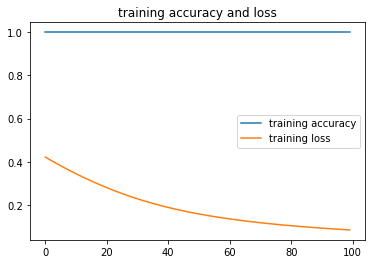

In [13]:
# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1; 表示为独热码有5个输入特征，每个时间步输入特征个数为5

x_train = np.reshape(x_train, (len(x_train),1,5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])

model_savepath = "./rnn_onehot_checkpoint/rnn_onehot_1pre1.ckpt"

if os.path.exists(model_savepath+'.index'):
    print("-----------------load model-------------------")
    model.load_weights(model_savepath)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_savepath,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型)

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])
model.summary()

with open("./rnn_onehot_1pre1_weights.txt", 'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy)+'\n')
        
        
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']  

plt.plot(acc, label='training accuracy')
plt.plot(loss, label='training loss')
plt.title('training accuracy and loss')
plt.legend()
plt.show()

In [18]:
preNum = int(input("input number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[alphabet1]]]
    alphabet = np.reshape(alphabet,(1,1,5))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + "->" + input_word[pred])

input number of test alphabet:5
input test alphabet:a
input test alphabet:b
input test alphabet:c
input test alphabet:d
input test alphabet:e


In [29]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, SimpleRNN

In [30]:
input_word = 'abcde'
w_to_id = {'a':0,'b':1,'c':2,'d':3,'e':4}
id_to_onehot = {0:[1.,0.,0.,0.,0.], 1:[0.,1.,0.,0.,0.],2:[0.,0.,1.,0.,0.],3:[0.,0.,0.,1.,0.],4:[0.,0.,0.,0.,1.]}

In [31]:
x_train = [
    [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']]],
    [id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]],
    [id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']]],
    [id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']]],
    [id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']]]
]

y_train = [w_to_id['e'], w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d']]

In [32]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

In [33]:
x_train = np.reshape(x_train,(len(x_train), 4, 5))
y_train = np.array(y_train)

model = tf.keras.models.Sequential([
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model_save_path = "./rnn_4pre1_checkpoint/rnn_4pre1.ckpt"
if os.path.exists(model_save_path+'.index'):
    print('=============load model=================')
    model.load_weights(model_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='loss')
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])
model.summary()

Epoch 1/100
1/1 [==============================] - 1s 598ms/step - loss: 1.6861 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.6504 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.6159 - sparse_categorical_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.5823 - sparse_categorical_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1.5495 - sparse_categorical_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 1.5175 - sparse_categorical_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1.4863 - sparse_categorical_accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1.4560 - sparse_categorical_accuracy: 0.4000
Epoch 9/100
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 0.4454 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4366 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 975us/step - loss: 0.4281 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 973us/step - loss: 0.4116 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4036 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3959 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3883 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 2ms/step - loss: 0

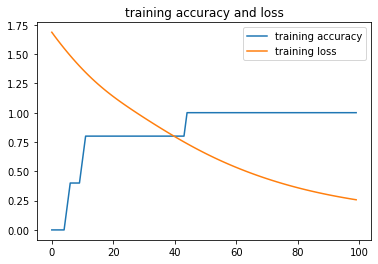

In [34]:
with open("./rnn_4pre1_weights.txt",'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy())+'\n')

acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.plot(acc, label='training accuracy')
plt.plot(loss, label='training loss')
plt.title("training accuracy and loss")
plt.legend()
plt.show()

In [38]:
preNum = int(input("the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[a]] for a in alphabet1]
    alphabet = np.reshape(alphabet, (1,4,5))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    print(alphabet1 + "->" + input_word[pred])
    #tf.print(alphabet1 + "->" + input_word[pred])

the number of test alphabet:5
input test alphabet:acbd
acbd->e
input test alphabet:bcda
bcda->b
input test alphabet:caed
caed->d
input test alphabet:dddd
dddd->c
input test alphabet:aadd
aadd->b
